In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [80]:
files = os.listdir('../Data/2024_08_07_EADAM/')

In [81]:
dfs = [pd.read_csv('../Data/2024_08_07_EADAM/'+file) for file in files]


In [82]:
df = pd.concat(dfs)

In [83]:
custom_palette = {
    3: 'blue',
    4: 'green',
    5: 'orange',
    6: 'purple',
    7: 'brown',
    8: 'black'
}


In [84]:
df['proportion_different'] = df['n_differences']/df['n']


In [85]:
pre_grouped = df.groupby(['n', 'k'])['proportion_different'].mean().reset_index()

In [86]:
pre_grouped['1/f(x)']= 1/pre_grouped['proportion_different']

In [104]:
def make_plots(k, df, pg):
    
    df = df[df['k']==k]
    pg = pg[pg['k']==k]
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.lineplot(data=df, x='n', y='proportion_different', ax=ax[0], palette=custom_palette)
    sns.lineplot(data=pg, x='n', y='1/f(x)', ax=ax[1], palette=custom_palette)
    ax[0].set_ylabel('Proportion of Students that Change')
    ax[1].set_ylabel('1/(Proportion of Students that Change)')
    ax[1].set_xscale('log')
    fig.suptitle(f'k={k}')

C:\Users\v-kirdwivedi\AppData\Local\Temp\ipykernel_23592\224509107.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='n', y='proportion_different', ax=ax[0], palette=custom_palette)
C:\Users\v-kirdwivedi\AppData\Local\Temp\ipykernel_23592\224509107.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=pg, x='n', y='1/f(x)', ax=ax[1], palette=custom_palette)


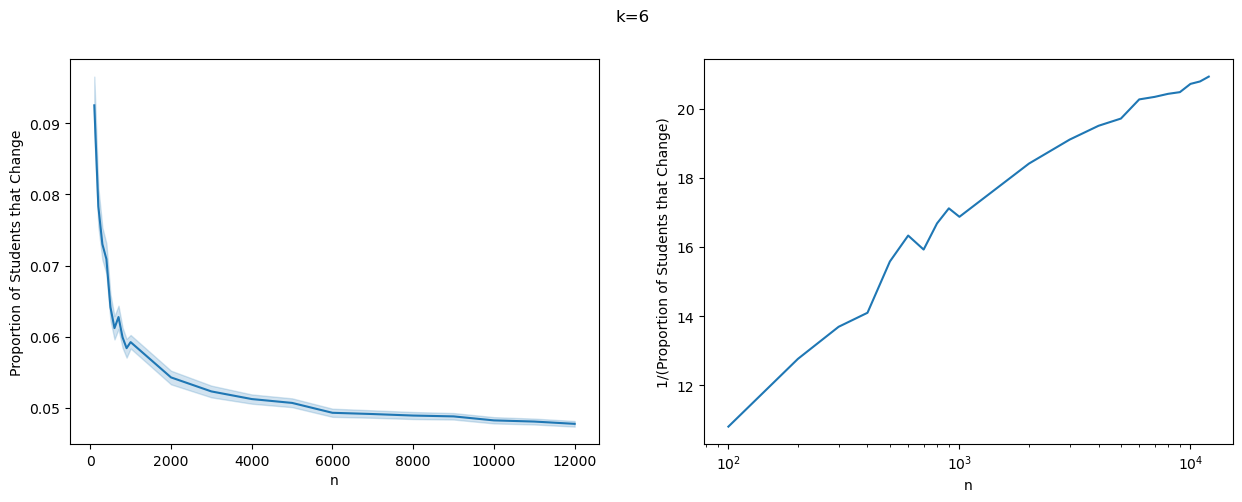

In [107]:
make_plots(6, df, pre_grouped)